**Importing the libraries**

In [3]:
import numpy as np
import pandas as pd

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

**Loading the dataset**

In [6]:
df = sns.load_dataset("mpg")

In [7]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [9]:
df.drop(["name"], axis = 1, inplace = True)

In [10]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,usa
1,15.0,8,350.0,165.0,3693,11.5,70,usa
2,18.0,8,318.0,150.0,3436,11.0,70,usa
3,16.0,8,304.0,150.0,3433,12.0,70,usa
4,17.0,8,302.0,140.0,3449,10.5,70,usa


**Summary of the dataset**

In [12]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


**Data Preprocessing**


In [15]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [16]:
df[df.isnull().any(axis = 1)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
32,25.0,4,98.0,NaN,2046,19.0,71,usa
126,21.0,6,200.0,NaN,2875,17.0,74,usa
330,40.9,4,85.0,NaN,1835,17.3,80,europe
336,23.6,4,140.0,NaN,2905,14.3,80,usa
354,34.5,4,100.0,NaN,2320,15.8,81,europe
374,23.0,4,151.0,NaN,3035,20.5,82,usa


In [17]:
df.dropna(inplace = True)

In [18]:
df.isnull().sum().any()

False

In [19]:
df.shape

(392, 8)

**Univariate Analysis**

In [21]:
df.cylinders.unique()

array([8, 4, 6, 3, 5], dtype=int64)

In [22]:
df.cylinders.value_counts()

cylinders
4    199
8    103
6     83
3      4
5      3
Name: count, dtype: int64

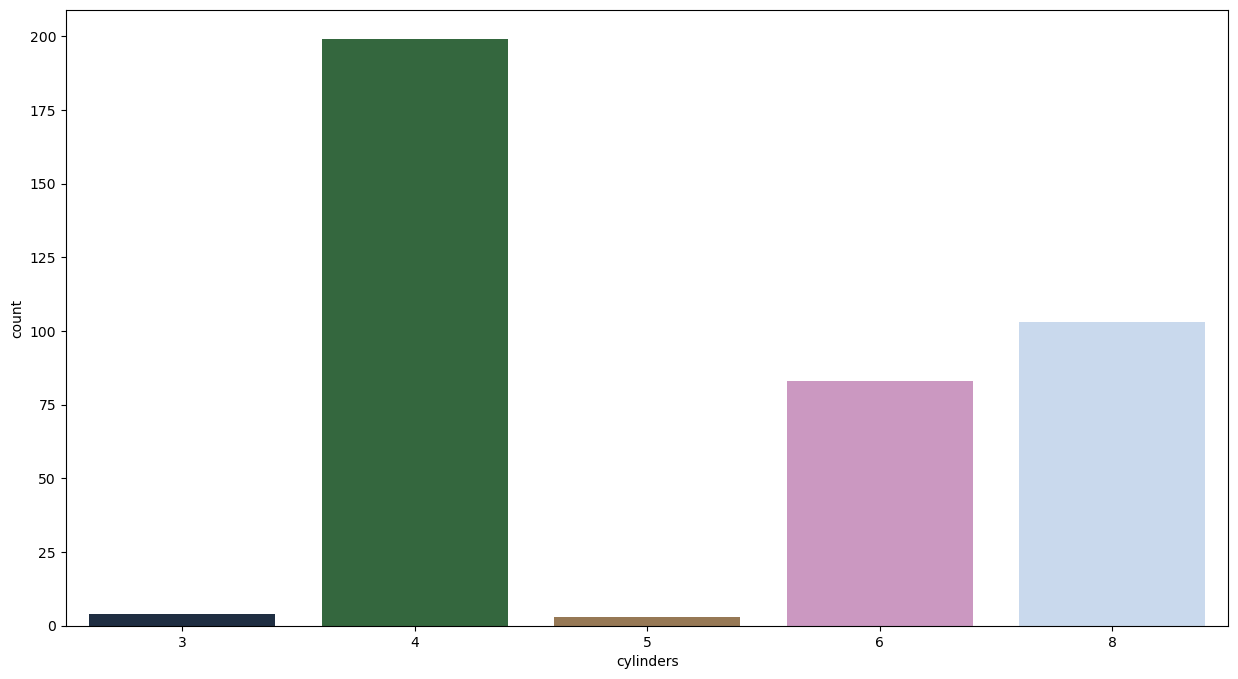

In [23]:
plt.figure(figsize = (15, 8))
sns.countplot(x = "cylinders", data = df, palette = "cubehelix")
plt.show()

In [24]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,usa
1,15.0,8,350.0,165.0,3693,11.5,70,usa
2,18.0,8,318.0,150.0,3436,11.0,70,usa
3,16.0,8,304.0,150.0,3433,12.0,70,usa
4,17.0,8,302.0,140.0,3449,10.5,70,usa


In [25]:
df["model_year"] = (1900 + df.model_year)

In [26]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,1970,usa
1,15.0,8,350.0,165.0,3693,11.5,1970,usa
2,18.0,8,318.0,150.0,3436,11.0,1970,usa
3,16.0,8,304.0,150.0,3433,12.0,1970,usa
4,17.0,8,302.0,140.0,3449,10.5,1970,usa


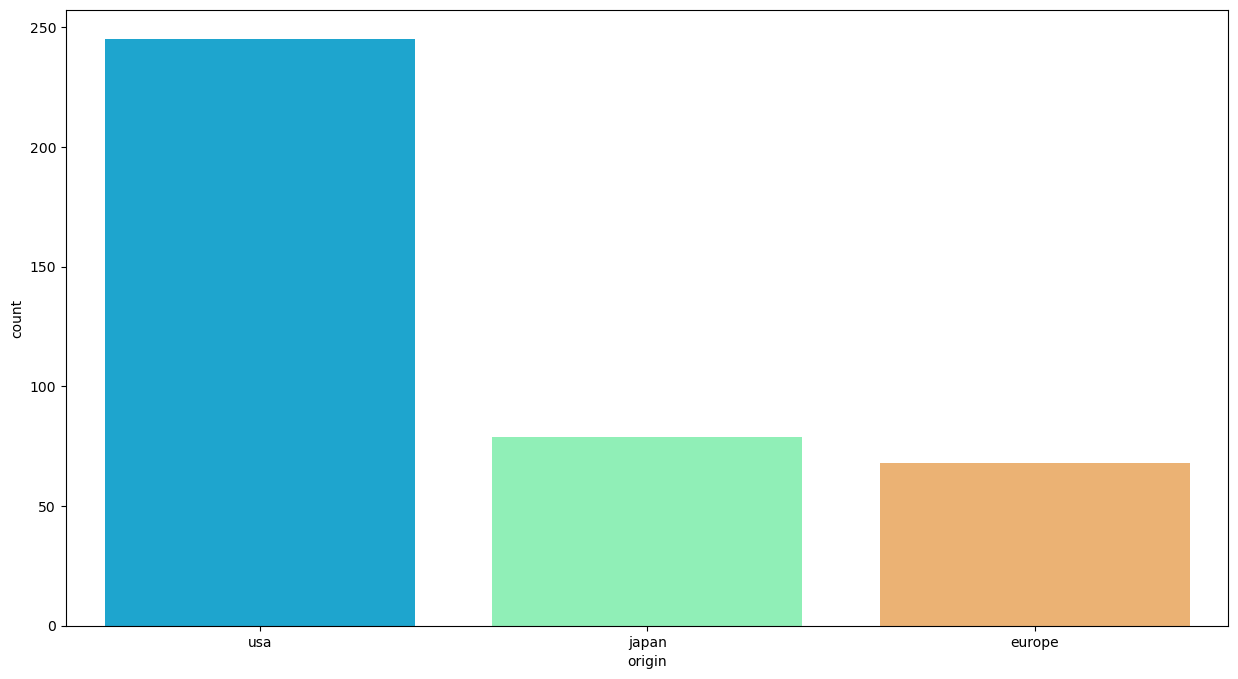

In [27]:
plt.figure(figsize = (15, 8))
sns.countplot(x= "origin", data = df, palette = "rainbow")
plt.show()

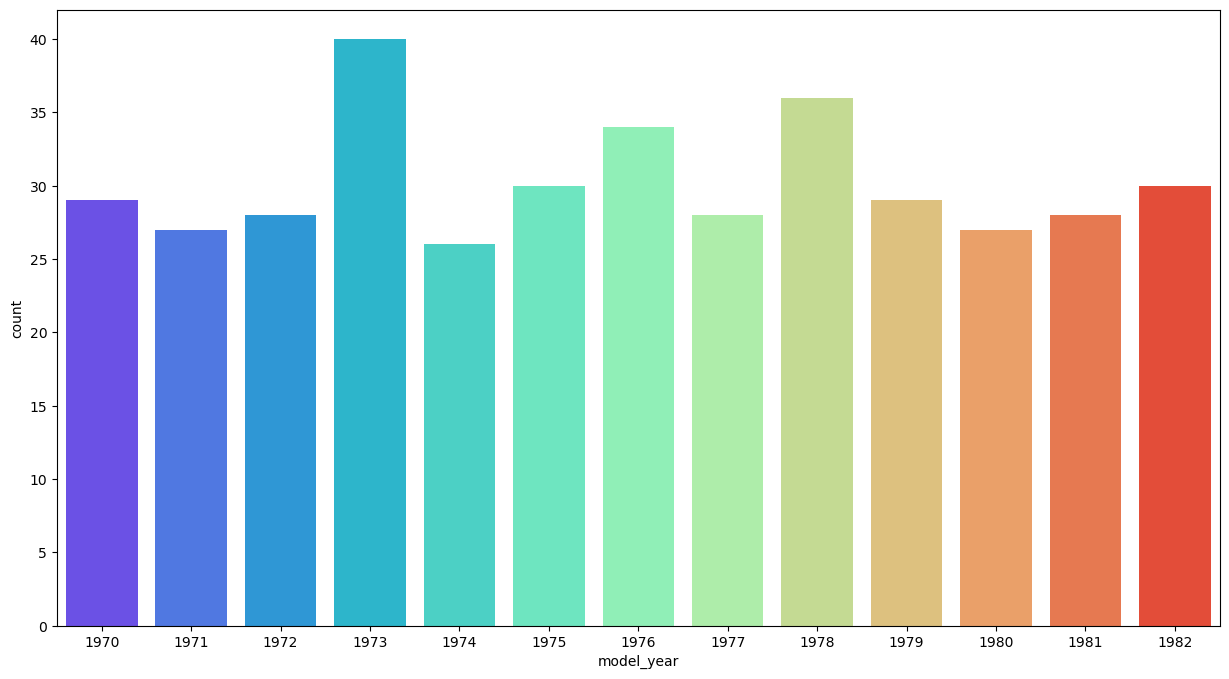

In [28]:
plt.figure(figsize = (15, 8))
sns.countplot(x= "model_year", data = df, palette = "rainbow")
plt.show()

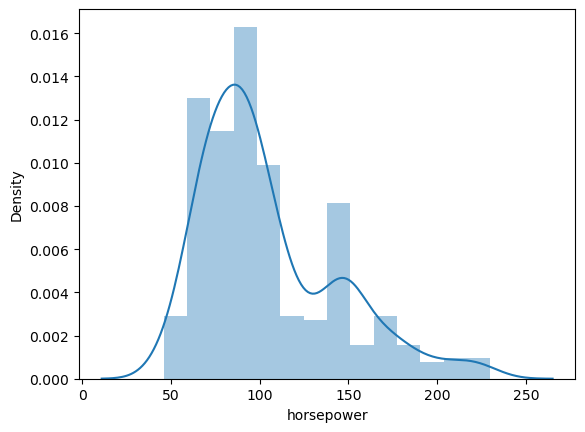

In [29]:
sns.distplot(df["horsepower"])
plt.show()

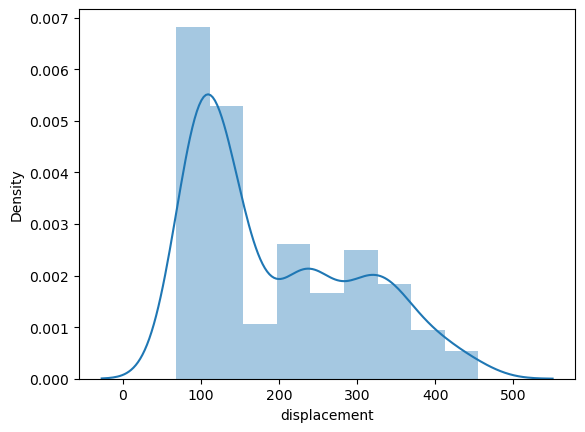

In [30]:
sns.distplot(df["displacement"])
plt.show()

**Bivariate Analysis**

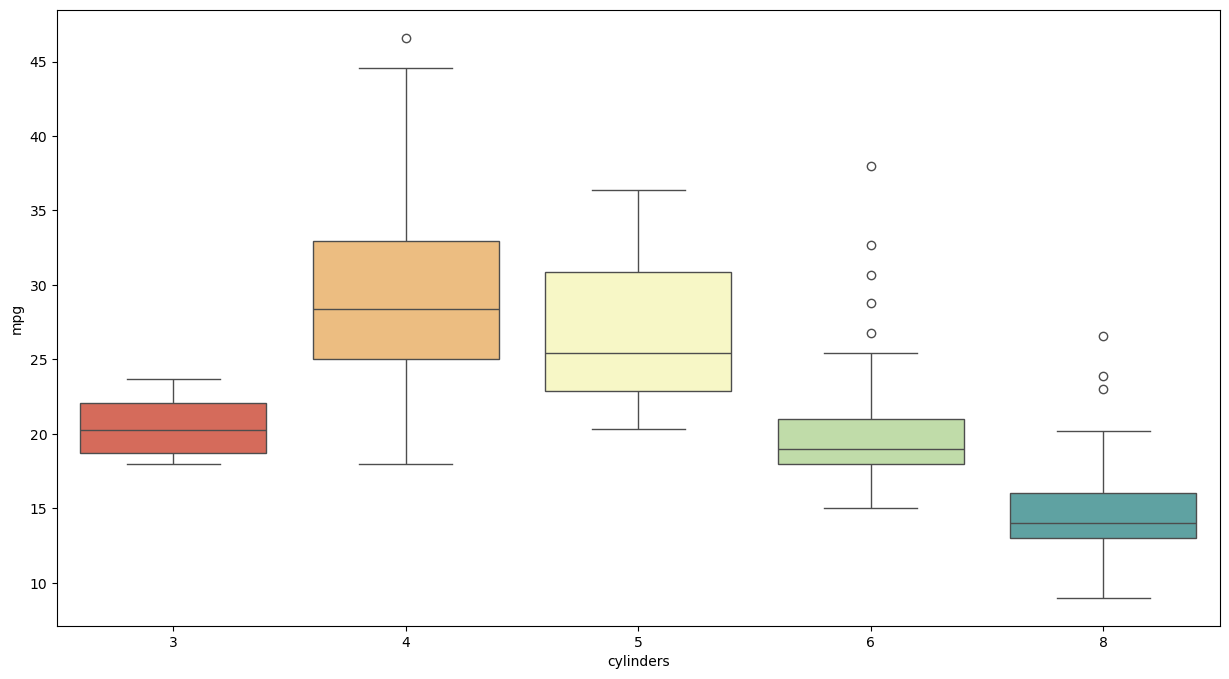

In [32]:
plt.figure(figsize = (15,8))
sns.boxplot(x = "cylinders", y = "mpg", data = df, palette = "Spectral")
plt.show()

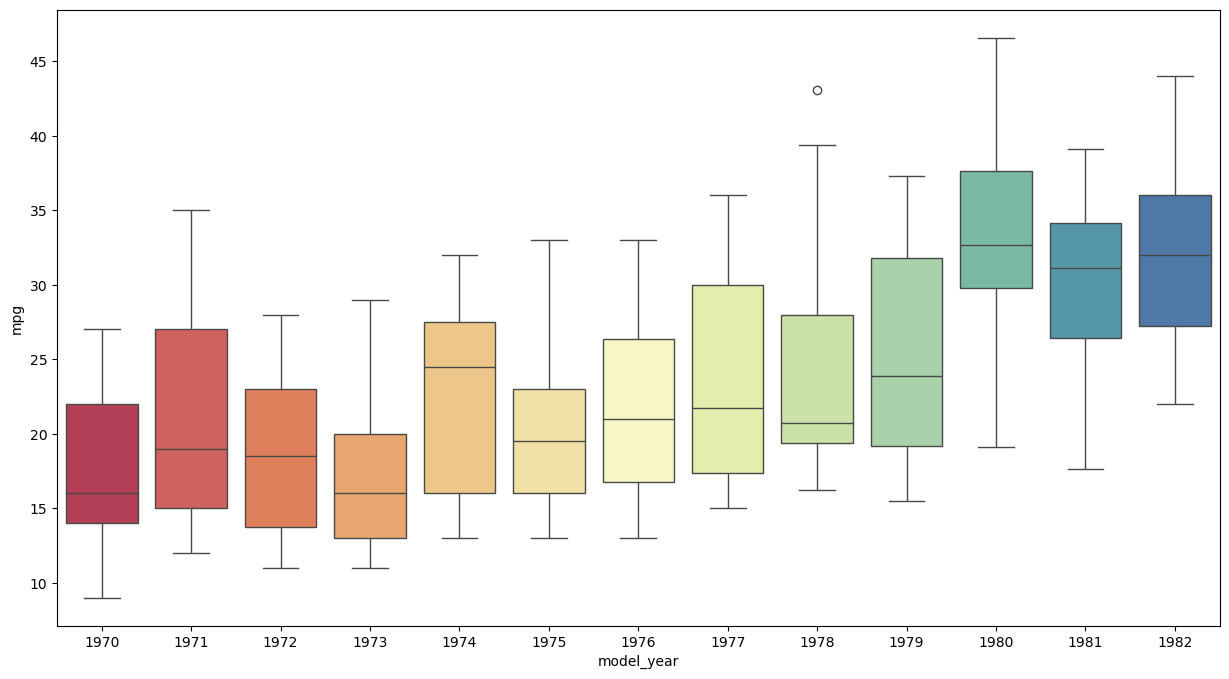

In [34]:
 plt.figure(figsize = (15,8))
sns.boxplot(x = "model_year", y = "mpg", data = df, palette = "Spectral")
plt.show()

 **Multivariate Analysis**

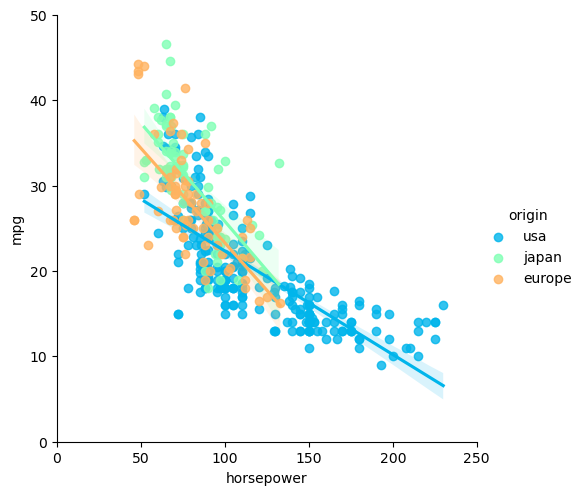

In [49]:
graph = sns.lmplot(x = "horsepower", y = "mpg", hue = "origin", data = df, palette = "rainbow")
graph.set(xlim = (0,250))
graph.set(ylim = (0,50))
plt.show()

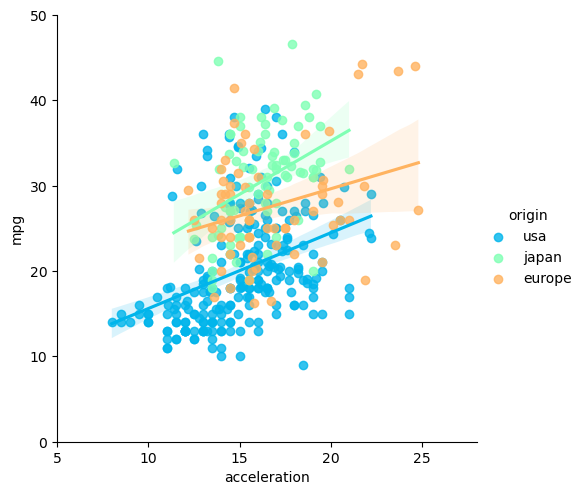

In [50]:
graph = sns.lmplot(x = "acceleration", y = "mpg", hue = "origin", data = df, palette = "rainbow")
graph.set(ylim = (0,50))
graph.set(xlim = (5,28))
plt.show()

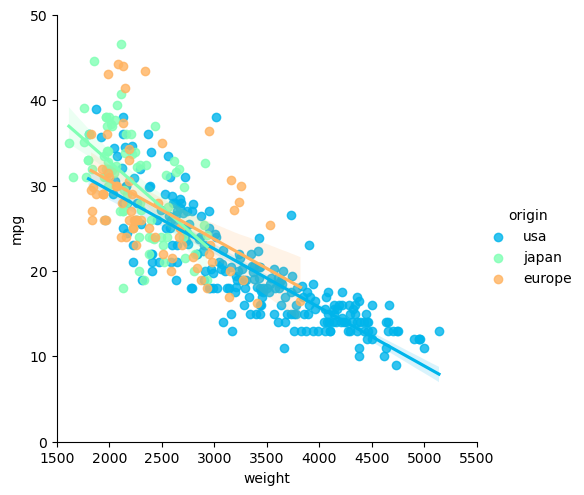

In [51]:
graph = sns.lmplot(x = "weight", y = "mpg", hue = "origin", data = df, palette = "rainbow")
graph.set(ylim = (0,50))
graph.set(xlim = (1500,5500))
plt.show()

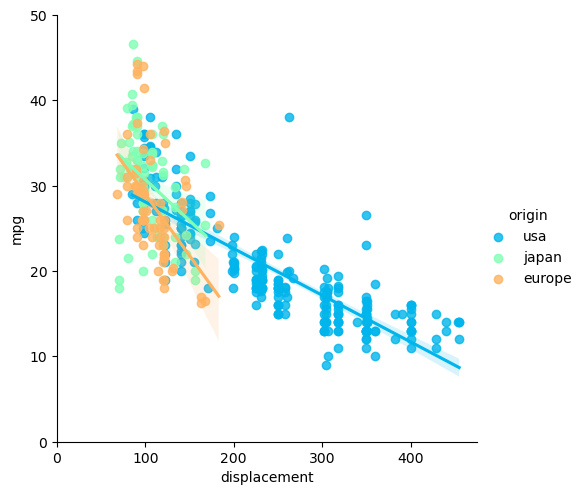

In [52]:
graph = sns.lmplot(x = "displacement", y = "mpg", hue = "origin", data = df, palette = "rainbow")
graph.set(ylim = (0,50))
graph.set(xlim = (0,475))
plt.show()

**Heatmap of Correlation Matrix**

In [59]:
non_numeric_columns = df.select_dtypes(exclude = ['number']).columns
print(non_numeric_columns)

Index(['origin'], dtype='object')


In [61]:
df_numeric_only = df.select_dtypes(exclude=['object'])

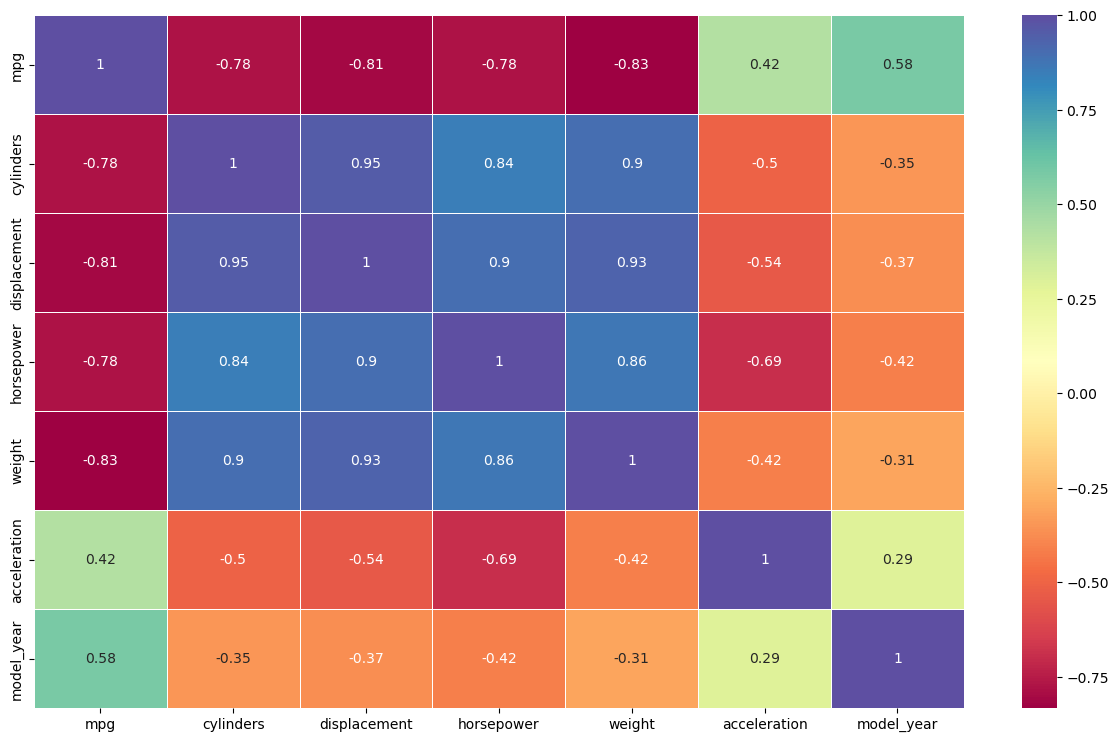

In [64]:
plt.figure(figsize = (15,9))
sns.heatmap(df_numeric_only.corr(), annot = True, linewidth = 0.5, cmap = "Spectral")
plt.show()

*Acceleration value is not influential because it has the lowest value against mpg, whereas the weight value is the most influential because it has the highest value (do minus matter?) displacement gets also removed because it has high correlation and it can contradict with mpg*

In [68]:
df.drop(["acceleration", "displacement"], axis = 1, inplace = True)

In [69]:
df.head()

,mpg,cylinders,horsepower,weight,model_year,origin
0,18.0,8,130.0,3504,1970,usa
1,15.0,8,165.0,3693,1970,usa
2,18.0,8,150.0,3436,1970,usa
3,16.0,8,150.0,3433,1970,usa
4,17.0,8,140.0,3449,1970,usa


In [70]:
from datetime import datetime

In [71]:
today = datetime.today()

In [73]:
today

datetime.datetime(2024, 12, 9, 19, 25, 55, 172045)

In [74]:
this_year = today.year
this_year

2024

In [76]:
df["age"] = this_year - df.model_year

In [78]:
df.drop(["model_year"], axis = 1, inplace = True)

In [80]:
df.head()

,mpg,cylinders,horsepower,weight,origin,age
0,18.0,8,130.0,3504,usa,54
1,15.0,8,165.0,3693,usa,54
2,18.0,8,150.0,3436,usa,54
3,16.0,8,150.0,3433,usa,54
4,17.0,8,140.0,3449,usa,54


In [83]:
df.origin.unique()

array(['usa', 'japan', 'europe'], dtype=object)

In [92]:
df = pd.get_dummies(df, drop_first = True)

In [97]:
df.head()

,mpg,cylinders,horsepower,weight,age,origin_japan,origin_usa
0,18.0,8,130.0,3504,54,False,True
1,15.0,8,165.0,3693,54,False,True
2,18.0,8,150.0,3436,54,False,True
3,16.0,8,150.0,3433,54,False,True
4,17.0,8,140.0,3449,54,False,True


In [99]:
df = df.applymap(lambda x: int(x) if isinstance(x, bool) else x)

In [101]:
df.head()

,mpg,cylinders,horsepower,weight,age,origin_japan,origin_usa
0,18.0,8,130.0,3504,54,0,1
1,15.0,8,165.0,3693,54,0,1
2,18.0,8,150.0,3436,54,0,1
3,16.0,8,150.0,3433,54,0,1
4,17.0,8,140.0,3449,54,0,1


**Modelling**

In [112]:
X = df.drop(["mpg"], axis = 1)
y = df["mpg"]

In [114]:
from sklearn.model_selection import train_test_split

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [118]:
X_train

,cylinders,horsepower,weight,age,origin_japan,origin_usa
260,6,110.0,3620,46,0,1
184,4,92.0,2572,48,0,1
174,6,97.0,2984,49,0,1
64,8,150.0,4135,52,0,1
344,4,64.0,1875,43,0,1
...,...,...,...,...,...,...
72,8,150.0,3892,52,0,1
107,6,100.0,2789,51,0,1
272,4,85.0,2855,46,0,1
352,4,65.0,2380,43,0,1


In [120]:
y_train

260    18.6
184    25.0
174    18.0
64     15.0
344    39.0
       ... 
72     15.0
107    18.0
272    23.8
352    29.9
103    11.0
Name: mpg, Length: 313, dtype: float64

In [122]:
from sklearn.linear_model import LinearRegression

In [124]:
lm_model = LinearRegression()

In [126]:
lm_model.fit(X_train, y_train)

LinearRegression()

In [128]:
lm_model.intercept_

79.80442103966982

In [130]:
coef_param = pd.DataFrame(lm_model.coef_, index = x.columns, columns = ["Coeffecient"])
coef_param

,Coeffecient
cylinders,0.203056
horsepower,-0.014143
weight,-0.005729
age,-0.779904
origin_japan,0.401853
origin_usa,-2.385047


In [132]:
y_pred = lm_model.predict(X_test)

In [134]:
my_dict = {"Actual" : y_test, "Pred" : y_pred}
compare = pd.DataFrame(my_dict)

In [136]:
compare.sample(10)

,Actual,Pred
15,22.0,18.949298
30,28.0,22.653558
385,38.0,35.885766
109,21.0,23.683072
296,27.4,26.708277
394,44.0,34.922648
115,15.0,13.832570
147,24.0,28.484170
152,19.0,20.379654
22,25.0,23.552078


In [138]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [140]:
def evaluation_metrics(actual, pred):
    MAE = mean_absolute_error(actual, pred)
    MSE = mean_squared_error(actual, pred)
    RMSE = np.sqrt(mean_squared_error(actual, pred))
    SCORE = r2_score(actual, pred)
    return print("r2_score:", SCORE, "\n", "mae:", MAE, "\n", "mse:", MSE, "\n", "rmse:", RMSE)

In [144]:
evaluation_metrics(y_test, y_pred)

r2_score: 0.7798249880881912 
 mae: 2.518828157615087 
 mse: 11.237861022823031 
 rmse: 3.352291905968666


In [146]:
!pip install yellowbrick 

   ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
   ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/282.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/282.6 kB ? eta -:--:--
   ----- --------------------------------- 41.0/282.6 kB 326.8 kB/s eta 0:00:01
   --------- ----------------------------- 71.7/282.6 kB 491.5 kB/s eta 0:00:01
   ------------------- ------------------ 143.4/282.6 kB 711.9 kB/s eta 0:00:01
   ------------------- ------------------ 143.4/282.6 kB 711.9 kB/s eta 0:00:01
   -------------------------------------  276.5/282.6 kB 896.4 kB/s eta 0:00:01
   -------------------------------------- 282.6/282.6 kB 830.4 kB/s eta 0:00:00


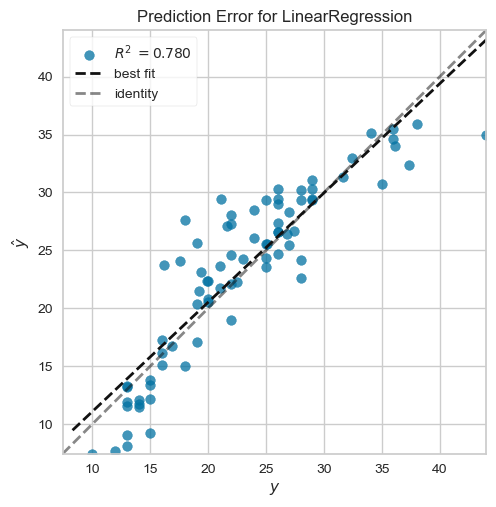

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [148]:
from yellowbrick.regressor import PredictionError

visualizer = PredictionError(lm_model)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)

visualizer.show()

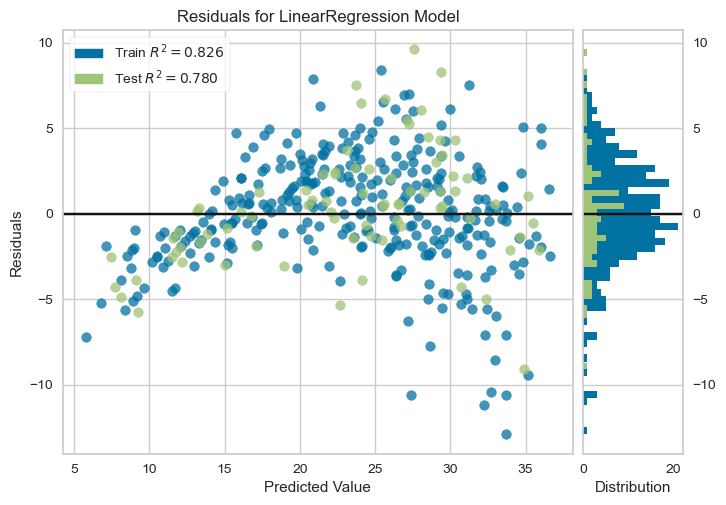

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [150]:
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(lm_model)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)

visualizer.show()